# **Hoja de Trabajo 1 - Visión por Computadora**

- Paula Barillas - 22764
- Gerardo Pineda - 22880
- Mónica Salvatierra - 22249

Link del repositorio: https://github.com/alee2602/HDT1-VPC


## **Task 1 - Análisis Teórico**

Considere cada uno de los siguientes escenarios y responda según corresponda:

1. Como director de un proyecto de conducción autónoma, debe dimensionar el hardware para un
nuevo vehículo. El sistema utiliza 8 cámaras que capturan video a resolución 4K UHD (3840 x 2160).
Debido a la necesidad de alto rango dinámico (HDR), los sensores operan a 12 bits por píxel (Raw
Bayer Pattern) a 60 FPS.Métrica A: Enfocada puramente en el flujo vehicular.

 **a. Calcule el tamaño exacto de una sola imagen (frame) cruda en Megabytes (MB).**

![inciso a](img/IMG_3679.jpg)

 **b. Calcule el ancho de banda necesario (en Gbps) para transmitir el flujo de las 8 cámaras al procesador central sin compresión.**

 ![inciso b](img/IMG_3680.jpg)

 **c. Si su procesador tiene una memoria RAM reservada de 16 GB exclusivamente para el buffer
de video, ¿cuántos segundos de historia puede almacenar antes de empezar a sobrescribir datos?**

![inciso c](img/IMG_3681.jpg)

 **d. Basado en su resultado, ¿es viable enviar estos datos "crudos" a la nube en tiempo real
usando 5G? Justifique.**

- Realmente, no es viable enviar datos crudos a la nube por 5G, porque el flujo supera ampliamente las capacidades reales de una red 5G (1–3 Gbps, máximo 20 Gbps). Además la latencia y la variabilidad de red no cumplen los requisitos de seguridad necesarios para conducción autónoma. 

**2. Considere un píxel con valor de intensidad Iin=50 en una imagen estándar de 8 bits (0−255). Se
aplican dos procesos de mejora secuenciales en el siguiente orden:**

**I. Corrección Gamma con γ=0.5 (para expandir sombras).**

**II. Ajuste Lineal con ganancia α=1.2 y brillo β=-10 (para contrastar).**

Realice los cálculos en el dominio de flotantes normalizados [0,1] como dicta la buena práctica y
convierta a entero de 8 bits solo al final.

**a. Calcule el valor final del píxel I_out.**

 ![inciso a](img/IMG_3682.jpg)

**b. ¿Hubo saturación (clipping) en el proceso?**

- No hubo saturación durante el proceso, porque nunca se sale del rango [0,1] al realizar los ajustes pertinentes.

**c. Si hubiéramos realizado las operaciones usando uint8 directamente sin convertir a float (truncando decimales en cada paso intermedio), ¿cuál habría sido el error numérico
resultante?**

![inciso c](img/IMG_3683.jpg)



 

**3. Usted está programando un robot clasificador de pelotas. Tiene dos objetos: una pelota roja brillante bajo el sol R_rgb=(255,0,0) y la misma pelota roja en una sombra profunda S_rgb=(50,0,0)**

**a. Calcule la distancia entre estos dos colores en el espacio RGB**

![inciso a](img/IMG_3684.jpg)

**b. Convierta ambos colores al espacio HSV (asuma rangos normalizados
H∈[0,1],S∈[0,1],V∈[0,1] para simplificar, sabiendo que el Hue del rojo es 0).**

![inciso b](img/IMG_3685.jpg)

**c. Calcule la diferencia absoluta canal por canal en HSV**

![inciso c](img/IMG_3686.jpg)

**d. Argumente matemáticamente por qué un algoritmo de agrupación (clustering) simple fallaría en RGB pero funcionaría en HSV para determinar que ambos píxeles pertenecen al mismo objeto "pelota roja".**

- En RGB, la separación numérica entre los dos píxeles es muy grande porque el canal rojo pasa de 50 a 205. Esa diferencia de 205 unidades representa casi la mitad del rango total posible en RGB, así que matemáticamente ambos puntos quedan muy lejos uno del otro en el espacio de color. 

    Para un algoritmo de clustering, esa distancia tan grande indica que pertenecen a grupos distintos. En cambio, cuando se convierten a HSV, ambos píxeles conservan exactamente el mismo matiz y la misma saturación, por lo que su distancia en esas dos dimensiones es literalmente cero. La única diferencia aparece en el valor de brillo, donde uno está en el máximo y el otro alrededor del 20%, lo cual modifica solo una dimensión del espacio HSV sin alterar la posición del color real. 

    Por eso, desde un punto de vista matemático, en HSV los píxeles quedan mucho más cercanos y un algoritmo de agrupación puede reconocerlos como el mismo objeto “pelota roja” pese al cambio de iluminación.


## **Task 2 - Práctica**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def show_img(img, title="Imagen", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    # TODO: Matplotlib espera RGB, OpenCV carga BGR.
    # Verifica si la imagen tiene 3 canales y conviértela para visualización correcta.
    if len(img.shape) == 3 and cmap is None:
        img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_show = img
    
    plt.imshow(img_show, cmap=cmap)
    plt.axis('off')
    plt.show()

def manual_contrast_brightness(image, alpha, beta):
    """
    Aplica g(x) = alpha * f(x) + beta de forma segura.
    Args:
        image: numpy array uint8
        alpha: float (contraste)
        beta: float (brillo)
    Returns:
        numpy array uint8
    """
    # RETO 1: Implementar pipeline seguro
    # 1. Convertir a float32 y normalizar a [0, 1]
    # 2. Aplicar fórmula matemática vectorizada (Sin bucles for)
    # 3. Aplicar np.clip para evitar valores fuera de rango
    # 4. Des-normalizar (x255) y castear a uint8
    
    # TODO: Escribir código aquí
    img = image.astype(np.float32) / 255.0
    img = alpha * img + (beta / 255.0)
    img = np.clip(img, 0.0, 1.0)
    processed_img = (img * 255.0).astype(np.uint8)
    # processed_img = np.zeros_like(image) # Placeholder
    return processed_img

def manual_gamma_correction(image, gamma):
    """
    Aplica V_out = V_in ^ gamma
    """
    # RETO 2: Implementar corrección Gamma
    # Recordar: La operación potencia es costosa. 
    # Usar Look-Up Table (LUT) es una optimización común, pero aquí usa matemáticas directas en float.
    
    # TODO: Escribir código aquí
    img = image.astype(np.float32) / 255.0
    img = np.power(img, gamma)
    img = np.clip(img, 0.0, 1.0)
    gamma_img = (img * 255.0).astype(np.uint8)
    return gamma_img

def hsv_segmentation(image):
    """
    Segmentar un objeto de color específico (ej. verde o rojo)
    """
    # 1. Convertir a HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # RETO 3: Definir rangos para un color.
    # OJO: En OpenCV Hue es [0, 179].
    # Ejemplo: Si buscas verde, H está alrededor de 60 (en escala 0-179).
    # TODO: Definir lower_bound y upper_bound (np.array)
    # lower_bound = np.array([0, 100, 100])  Este rango es para la imagen carss si se quiere probar, se necesita otro filtro para quitar el amarillo (Creo)
    lower_bound = np.array([35, 20, 20])
    upper_bound = np.array([85, 255, 255])
    
    # Crear máscara
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    
    # Aplicar máscara a la imagen original (bitwise_and)
    result = cv2.bitwise_and(image, image, mask=mask)
    return result

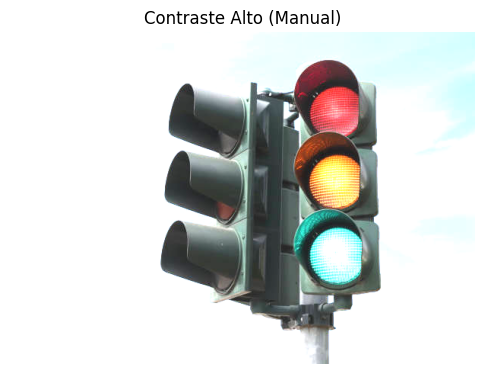

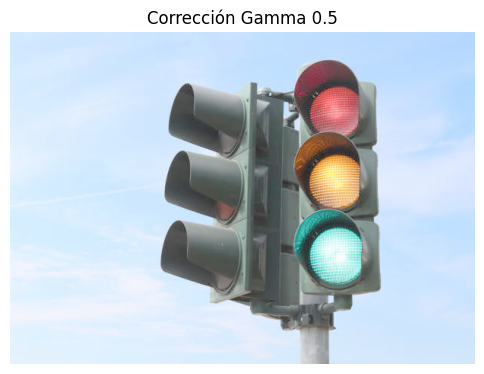

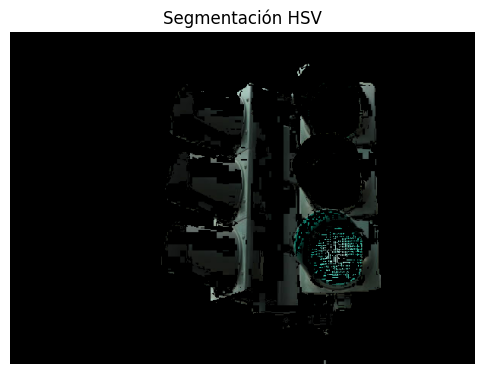

In [3]:
img = cv2.imread('img/smf.jpg')
    
if img is None:
    print("Error: No se encontró la imagen.")
else:
    # 1. Prueba de Contraste
    contrast_img = manual_contrast_brightness(img, 1.5, 20)
    show_img(contrast_img, "Contraste Alto (Manual)")
    
    # # 2. Prueba de Gamma
    gamma_img = manual_gamma_correction(img, 0.5) # Aclarar sombras
    show_img(gamma_img, "Corrección Gamma 0.5")
    
    # # 3. Segmentación
    seg_img = hsv_segmentation(img)
    show_img(seg_img, "Segmentación HSV")

## **Prompt Utilizado**

Uso de ChatGPT

Solicitamos a ChatGPT rangos en HSV para segmentar la luz verde del semáforo en nuestra foto. Nos propuso varios rangos y elegimos el que mejor funcionó en nuestras pruebas.

Rango elegido (OpenCV HSV):
```python
lower_bound = np.array([40, 80, 80])
upper_bound = np.array([90, 255, 255])
```

### Por qué funcionó este prompt
- En este caso pedimos explícitamente rangos HSV para el color verde brillante del semáforo de la foto. En donde ChatGPT nos ofreció varias opciones y verificamos visualmente; el rango anterior dio la segmentación más limpia; Ya que el rango evita sombras y grises al exigir S y V altos y se puede observar que cubre el verde cian esperado en la luz del semáforo.

## **Task 3 Preguntas Post-Práctica**

**1. En la diapositiva 15 se mencionó que "Iterar píxel a píxel en Python es un Pecado Capital". Explique en términos de gestión de memoria y CPU por qué una operación vectorizada en NumPy es órdenes de magnitud más rápida que un for loop.**

En este caso al vectorizar en NumPy, consideramos que es como usar una licuadora  en lugar de picar fruta a mano por lo cuál los datos están contiguos en la RAM y la operación se ejecuta en C de manera optimizada,de manera que se evite el overhead del intérprete y aproveché el  caché y SIMD. Ya que el for en Python procesa píxel por píxel y basicamente paga peaje por cada iteración.

**2. Al visualizar imágenes con matplotlib, ¿qué sucede si olvida que OpenCV carga las imágenes en formato BGR? ¿Cómo se ve visualmente el error?**

Consideramos que al olvidar que el  ue OpenCV lee en BGR, lo que pasaría es que al mostrar en matplotlib los colores salen cambiados por ejemplo se observaría cielos naranjas, hojas moradas, piel azulada. Donde este error se vería como un “filtro raro”.

**3. Al visualizar imágenes con matplotlib, ¿qué sucede si olvida que OpenCV carga las imágenes en formato BGR? ¿Cómo se ve visualmente el error?**

Esta pregunta estaba repetida en el pdf :(, pero como mencionabamos; el error luce como un filtro psicodélico; ya que los  rojos se vuelven azules, verdes se ven magenta o basicamente basta convertir BGR→RGB antes.